In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filename = '/content/drive/My Drive/Colab Notebooks/dataset/sonar.csv'

In [3]:
df = pd.read_csv(filename)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [4]:
print(df.head())

   0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032  R
0  0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044  R
1  0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078  R
2  0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117  R
3  0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094  R
4  0.0286  0.0453  0.0277  0.0174  0.0384  ...  0.0057  0.0027  0.0051  0.0062  R

[5 rows x 61 columns]


In [5]:
dataset = df.values
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

In [6]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
print(Y_obj)
print(Y)

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # 데이터 분리 = 학습 + 테스트

In [9]:
print(X.shape)
print(X_train.shape) # 훈련 70%, 테스트 30% 
print(X_test.shape)

(207, 60)
(144, 60)
(63, 60)


In [10]:
model = Sequential()
model.add(Dense(24, input_dim = 60, activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))


In [11]:
model.compile(loss="mean_squared_error",
              optimizer='adam',
              metrics=["accuracy"]
              )

In [12]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=5)

Epoch 1/200
29/29 [==============================] - 1s 2ms/step - loss: 0.2563 - accuracy: 0.5000
Epoch 2/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.5903
Epoch 3/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.6389
Epoch 4/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2345 - accuracy: 0.6458
Epoch 5/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.6806
Epoch 6/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.6944
Epoch 7/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.7083
Epoch 8/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2143 - accuracy: 0.6944
Epoch 9/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.7083
Epoch 10/200
29/29 [==============================] - 0s 1ms/step - loss: 0.2029 - accuracy: 0.6875
Epoch 11/

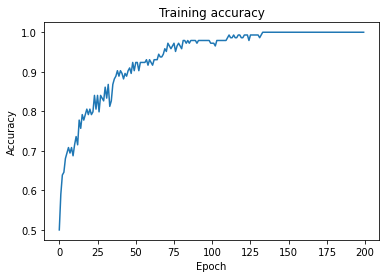

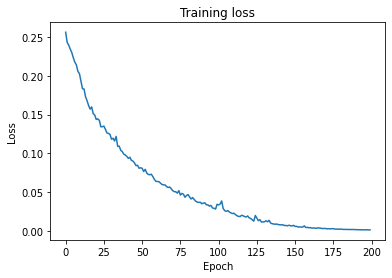

In [13]:
import matplotlib.pyplot as plt
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [14]:
test_loss, test_acc= model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1708 - accuracy: 0.8095


In [15]:
print(test_acc)

0.8095238208770752
